## importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

## read data

In [3]:
df_mushroom =  pd.read_csv('agaricus-lepiota.data', header = None, sep=',')

In [4]:
df_mushroom.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


## rename columns

In [5]:
df_mushroom.columns = ["class"
                      ,"cap-shape"
                      ,"cap-surface"
                      ,"cap-color"
                      ,"bruises"
                      ,"odor"
                      ,"gill-attachment"
                      ,"gill-spacing"
                      ,"gill-size"
                      ,"gill-color"
                      ,"stalk-shape"
                      ,"stalk-root"
                      ,"stalk-surface-above-ring"
                      ,"stalk-surface-below-ring"
                      ,"stalk-color-above-ring"
                      ,"stalk-color-below-ring"
                      ,"veil-typ"
                      ,"veil-color"
                      ,"ring-number"
                      ,"ring-type"
                      ,"spore-print-color"
                      ,"population"
                      ,"habitat"]

In [6]:
df_mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-typ,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


## keep class, odor and color columns

In [7]:
df_mushroom_subset = df_mushroom[["class", "odor", "cap-color"]]

In [8]:
df_mushroom_subset.head()

,class,odor,cap-color
0,p,p,n
1,e,a,y
2,e,l,w
3,p,p,w
4,e,n,g


In [9]:
df_mushroom_subset['class'].unique()

array(['p', 'e'], dtype=object)

In [10]:
df_mushroom_subset['odor'].unique()

array(['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'], dtype=object)

In [11]:
df_mushroom_subset['cap-color'].unique()

array(['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'], dtype=object)

## Create Dummy Columns

In [12]:
df_mushroom_dummies =  pd.get_dummies(df_mushroom_subset, drop_first=True)

In [13]:
df_mushroom_dummies.head()

,class_p,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y
0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


## Logistic Regression

### With ODOR as Predictor

In [14]:
odor_summary =  df_mushroom_subset.groupby(["class", "odor"]).agg(Count = ("class", "size")).reset_index()
odor_summary

,class,odor,Count
0,e,a,400
1,e,l,400
2,e,n,3408
3,p,c,192
4,p,f,2160
5,p,m,36
6,p,n,120
7,p,p,256
8,p,s,576
9,p,y,576


In [15]:
data = odor_summary.pivot(index="odor", columns="class", values="Count")
data = data.fillna(0)
data

class,e,p
odor,,
a,400.0,0.0
c,0.0,192.0
f,0.0,2160.0
l,400.0,0.0
m,0.0,36.0
n,3408.0,120.0
p,0.0,256.0
s,0.0,576.0
y,0.0,576.0


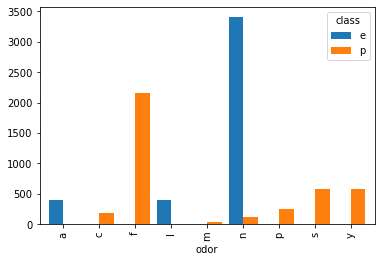

In [16]:
data.plot.bar(width=.8)

In [17]:
df_mushroom_dummies.columns

Index(['class_p', 'odor_c', 'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p',
       'odor_s', 'odor_y', 'cap-color_c', 'cap-color_e', 'cap-color_g',
       'cap-color_n', 'cap-color_p', 'cap-color_r', 'cap-color_u',
       'cap-color_w', 'cap-color_y'],
      dtype='object')

In [18]:
from sklearn.model_selection import train_test_split

y = df_mushroom_dummies["class_p"].values
# All data except "class" column.
x = df_mushroom_dummies[['odor_c', 'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p',
       'odor_s', 'odor_y']].values
# Split data for train and test.
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="liblinear")
lr.fit(x_train,y_train)

print("Accuracy:", round(lr.score(x_test,y_test)*100,2), "%")


Accuracy: 98.46 %


#### Confusion Matrix

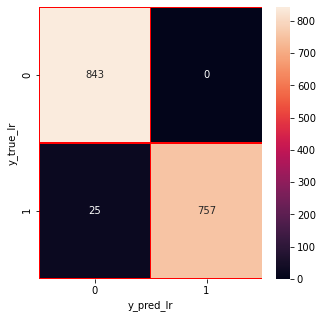

In [20]:
from sklearn.metrics import confusion_matrix
y_pred_lr = lr.predict(x_test)
y_true_lr = y_test
cm = confusion_matrix(y_true_lr, y_pred_lr)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_lr")
plt.ylabel("y_true_lr")
plt.show()

##### The Model is able to predict nature of mushroom with good accuracy

### With CAP COLOR as Predictor

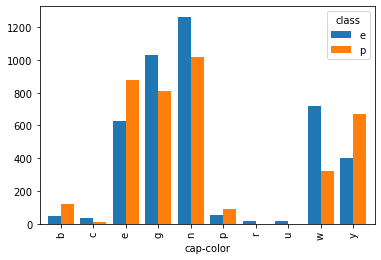

In [21]:
color_summary =  df_mushroom_subset.groupby(["class", "cap-color"]).agg(Count = ("class", "size")).reset_index()

data_color = color_summary.pivot(index="cap-color", columns="class", values="Count")
data_color = data_color.fillna(0)

data_color.plot.bar(width=.8)

In [22]:
from sklearn.model_selection import train_test_split

y = df_mushroom_dummies["class_p"].values
# All data except "class" column.
x = df_mushroom_dummies[[ 'cap-color_c', 'cap-color_e', 'cap-color_g',
       'cap-color_n', 'cap-color_p', 'cap-color_r', 'cap-color_u',
       'cap-color_w', 'cap-color_y']].values
# Split data for train and test.
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="liblinear")
lr.fit(x_train,y_train)

print("Accuracy:", round(lr.score(x_test,y_test)*100,2), "%")


Accuracy: 59.69 %


#### Confusion Matrix

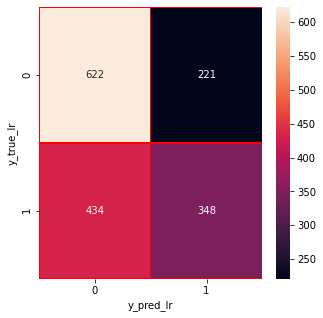

In [24]:
y_pred_lr = lr.predict(x_test)
y_true_lr = y_test
cm = confusion_matrix(y_true_lr, y_pred_lr)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_lr")
plt.ylabel("y_true_lr")
plt.show()

##### The Model aaccuracy is not good

### The model with Odor as predictor performed much better than the model with Cap Color as predictor. Let's try one iteration with both the variables.

#### With ODOR as well as CAP COLOR as Predictor

In [25]:
from sklearn.model_selection import train_test_split

y = df_mushroom_dummies["class_p"].values
# All data except "class" column.
x = df_mushroom_dummies[[ 'odor_c', 'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p',
       'odor_s', 'odor_y', 'cap-color_c', 'cap-color_e', 'cap-color_g',
       'cap-color_n', 'cap-color_p', 'cap-color_r', 'cap-color_u',
       'cap-color_w', 'cap-color_y']].values
# Split data for train and test.
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="liblinear")
lr.fit(x_train,y_train)

print("Accuracy:", round(lr.score(x_test,y_test)*100,2), "%")


Accuracy: 98.46 %


#### Confusion Matrix

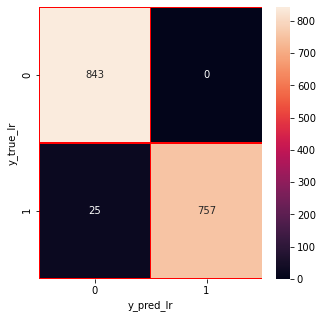

In [27]:
y_pred_lr = lr.predict(x_test)
y_true_lr = y_test
cm = confusion_matrix(y_true_lr, y_pred_lr)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_lr")
plt.ylabel("y_true_lr")
plt.show()

### Using both the variables did not add anything to the accuracy of the model. As next step, we can run analysis on rest of the available variables to see if they can improve the model performance.